In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn

In [231]:
dir = './data/'
df_x = pd.read_fwf(dir+'logistic_x.txt', header=None, names=['x1', 'x2'])
df_y = pd.read_fwf(dir+'logistic_y.txt', header=None, names=['y'])

In [232]:
df_x.sample(5)

,x1,x2
58,7.071846,-0.349617
64,7.705401,1.604556
13,2.677034,-3.019859
22,3.365248,-1.816494
11,3.094743,-3.644614


In [233]:
df_x.loc[:,'x0'] = 1.0

In [249]:
df_x = df_x[['x0', 'x1', 'x2']]

In [250]:
df_x.describe()

,x0,x1,x2
count,99.0,99.000000,99.000000
mean,1.0,3.923295,-0.349697
std,0.0,1.929964,1.771731
min,1.0,0.570799,-4.006504
25%,1.0,2.253922,-1.690592
50%,1.0,3.717708,-0.219744
75%,1.0,5.600951,1.110637
max,1.0,7.705401,3.812866


In [251]:
df_y.describe()

,y
count,99.000000
mean,-0.010101
std,1.005038
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,1.000000
max,1.000000


In [252]:
theta = np.zeros((df_x.shape[1],1))

In [253]:
theta

array([[0.],
       [0.],
       [0.]])

In [254]:
def sigmoid(x):
    a = 1/(1+ np.exp(-x))
    return a

In [255]:
def log_loss(h, x):
    p_hat = -np.log(h(x))
    return p_hat

In [256]:
def J(Y, X, theta):
    m=Y.shape[0] * 1.0
    z = np.multiply(Y, X @ theta)
    losses = log_loss(sigmoid, z)
    loss = np.sum(losses, axis=0)/m
    return loss

In [257]:
J(df_y, df_x, theta)

y    0.693147
dtype: float64

In [258]:
z = np.multiply(df_y, df_x @ theta)

In [259]:
losses = log_loss(sigmoid, z)

In [260]:
loss = np.sum(losses, axis=0)

In [261]:
losses.shape

(99, 1)

In [262]:
loss.shape

(1,)

In [300]:
def grad_J(Y, X, theta):
    m = Y.shape[0]*1.0
    z = np.multiply(Y, X @ theta)
    ys = np.tile(Y, X.shape[1])
    t0 = np.multiply(ys, X)
    t1 = 1 - sigmoid(z)
    gradients = np.multiply(t0, t1)
    gradient = -np.sum(gradients, axis=0)/m
    return gradient

In [301]:
grad_J(df_y, df_x, theta)

x0    0.005051
x1   -0.481506
x2   -0.554831
dtype: float64

In [302]:
gradient

x0    47.669048
x1    54.928232
dtype: float64

In [306]:
def Hessian_J(Y, X, theta):
    m = Y.shape[0] * 1.0
    z = np.multiply(Y, X @ theta)
    a = sigmoid(z)
    t0 = np.multiply(a, 1-a)
    t0 = np.tile(t0, (X.shape[1]*X.shape[1]))
    t0 = t0.reshape((X.shape[0], X.shape[1], X.shape[1]))
    t1 = np.matmul(df_x.to_numpy()[:,:,np.newaxis], df_x.to_numpy()[:, np.newaxis, :])
    hessians = np.multiply(t0, t1)
    hessian = np.sum(hessians, axis=0)/m
    return hessian

In [307]:
Hessian_J(df_y, df_x, theta)

array([[ 0.25      ,  0.98082384, -0.08742426],
       [ 0.98082384,  4.76984544, -0.18171064],
       [-0.08742426, -0.18171064,  0.80740309]])

In [308]:
hessian

array([[ 4.76984544, -0.18171064],
       [-0.18171064,  0.80740309]])

In [365]:
def newtons_method(Y, X, theta=None, epsilon=0.00000001):
    if theta is None:
        theta = np.zeros((X.shape[1],1))
        
    iterations = 0
    while True:
        hessian_inv = np.linalg.inv(Hessian_J(df_y, df_x, theta))
        gradient = grad_J(df_y, df_x, theta)
        theta_adjust = -hessian_inv @ gradient
        theta_adjust = theta_adjust.reshape((X.shape[1], -1))
        if np.abs(np.linalg.norm(theta_adjust)) < epsilon:
            break
        theta += theta_adjust
        iterations += 1
        print(f'number of iterations: {iterations}, hessian_inv: {hessian_inv}, gradient: {gradient}')
        print(f'theta_adjust: {theta_adjust}, theta: {theta}, J(theta)={J(df_y, df_x, theta)}')
    return theta

In [366]:
theta_final = newtons_method(df_y, df_x)

number of iterations: 1, hessian_inv: [[22.13242365 -4.49836521  1.3840792 ]
 [-4.49836521  1.125746   -0.23371994]
 [ 1.3840792  -0.23371994  1.33580452]], gradient: x0    0.005051
x1   -0.481506
x2   -0.554831
dtype: float64
theta_adjust: [[-1.50983811]
 [ 0.43509696]
 [ 0.62161752]], theta: [[-1.50983811]
 [ 0.43509696]
 [ 0.62161752]], J(theta)=y    0.374725
dtype: float64
number of iterations: 2, hessian_inv: [[32.88921408 -6.84626709  0.50729996]
 [-6.84626709  1.76118316  0.07421815]
 [ 0.50729996  0.07421815  2.48299552]], gradient: x0    0.000513
x1   -0.110868
x2   -0.132848
dtype: float64
theta_adjust: [[-0.7085082 ]
 [ 0.20863031]
 [ 0.33782964]], theta: [[-2.21834632]
 [ 0.64372727]
 [ 0.95944716]], J(theta)=y    0.33425
dtype: float64
number of iterations: 3, hessian_inv: [[46.41276773 -9.9066998  -1.4637219 ]
 [-9.9066998   2.59878999  0.69505625]
 [-1.4637219   0.69505625  4.34387524]], gradient: x0    0.000761
x1   -0.025010
x2   -0.036141
dtype: float64
theta_adjust: 

In [367]:
theta_final

array([[-2.6205116 ],
       [ 0.76037154],
       [ 1.17194674]])

In [370]:
x1 = np.arange(0,8.1,0.1)

In [372]:
x2 = -(theta_final[0] + theta_final[1] * x1)/theta_final[2]

In [373]:
x2

array([ 2.23603301,  2.17115194,  2.10627088,  2.04138981,  1.97650874,
        1.91162768,  1.84674661,  1.78186555,  1.71698448,  1.65210342,
        1.58722235,  1.52234128,  1.45746022,  1.39257915,  1.32769809,
        1.26281702,  1.19793596,  1.13305489,  1.06817382,  1.00329276,
        0.93841169,  0.87353063,  0.80864956,  0.7437685 ,  0.67888743,
        0.61400636,  0.5491253 ,  0.48424423,  0.41936317,  0.3544821 ,
        0.28960104,  0.22471997,  0.1598389 ,  0.09495784,  0.03007677,
       -0.03480429, -0.09968536, -0.16456643, -0.22944749, -0.29432856,
       -0.35920962, -0.42409069, -0.48897175, -0.55385282, -0.61873389,
       -0.68361495, -0.74849602, -0.81337708, -0.87825815, -0.94313921,
       -1.00802028, -1.07290135, -1.13778241, -1.20266348, -1.26754454,
       -1.33242561, -1.39730667, -1.46218774, -1.52706881, -1.59194987,
       -1.65683094, -1.721712  , -1.78659307, -1.85147413, -1.9163552 ,
       -1.98123627, -2.04611733, -2.1109984 , -2.17587946, -2.24

In [340]:
df_y.y.value_counts(normalize=True)

-1.0    0.505051
 1.0    0.494949
Name: y, dtype: float64

In [360]:
df_y[df_y.y==0].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

In [362]:
df_y[df_y.y==0].index

Int64Index([], dtype='int64')

[]

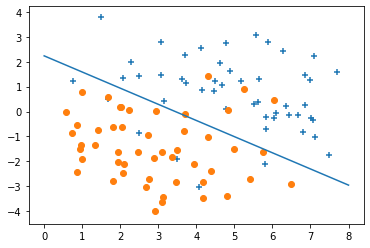

In [374]:
plt.scatter(df_x.loc[df_y[df_y.y==1].index, 'x1'], df_x.loc[df_y[df_y.y==1].index, 'x2'], marker='+')
plt.scatter(df_x.loc[df_y[df_y.y==-1].index, 'x1'], df_x.loc[df_y[df_y.y==-1].index, 'x2'], marker='o')
plt.plot(x1, x2)
plt.plot()

In [ ]:
logit_x = np.arange()